In [1]:
using Random, Plots
using Statistics


In [2]:
default(markerstrokecolor = :auto)             # nicer plot defaults


In [3]:
#pay-off table (T,R,P,S) = (5,3,1,0)
PAYOFF = Dict(
    ('C','C') => (3,3),
    ('C','D') => (0,5),
    ('D','C') => (5,0),
    ('D','D') => (1,1)
)

Dict{Tuple{Char, Char}, Tuple{Int64, Int64}} with 4 entries:
  ('D', 'D') => (1, 1)
  ('C', 'C') => (3, 3)
  ('C', 'D') => (0, 5)
  ('D', 'C') => (5, 0)

In [4]:
# Helper macro for quick averaging
macro avg(expr)
    :(mean($expr))
end

@avg (macro with 1 method)

In [6]:
function play_round!(q, histA, histB)
    # original TFT intentions
    origA = isempty(histA) ? 'C' : histB[end]
    origB = isempty(histB) ? 'C' : histA[end]

    # independent peek events
    seenA = rand() < q
    seenB = rand() < q

    # compute final moves without overwriting originals
    finalA = (seenA && origB == 'C') ? 'D' : origA
    finalB = (seenB && origA == 'C') ? 'D' : origB

    push!(histA, finalA);  push!(histB, finalB)
    return PAYOFF[(finalA, finalB)]
end


play_round! (generic function with 1 method)

In [7]:
#game loop
function simulate_game(p, T; rng=Random.GLOBAL_RNG)
    histA = Vector{Char}()
    histB = Vector{Char}()
    payA = 0.0

    for _ in 1:T
        a,b = play_round!(p, histA, histB)
        payA += a
    end
    return payA / T           # average per round
end

simulate_game (generic function with 1 method)

In [ ]:
#parameter grid
q_vals = range(0, 1; length = 21)          # 0.00, 0.05, ... , 1.00
T_vals = [1; 5:5:100]                      # 1, 5, 10, ... , 100

heat = zeros(length(T_vals), length(q_vals))
REPS = 300                           # smoother surface

@info "Running simulations …"
for (i, T) in enumerate(T_vals), (j, q) in enumerate(q_vals)
    avg_pay = mean([simulate_game(q, T) for _ in 1:REPS])
    heat[i, j] = avg_pay
end

┌ Info: Running simulations …
└ @ Main /home/resort/Documents/repos/RatUtopia/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X10sZmlsZQ==.jl:8


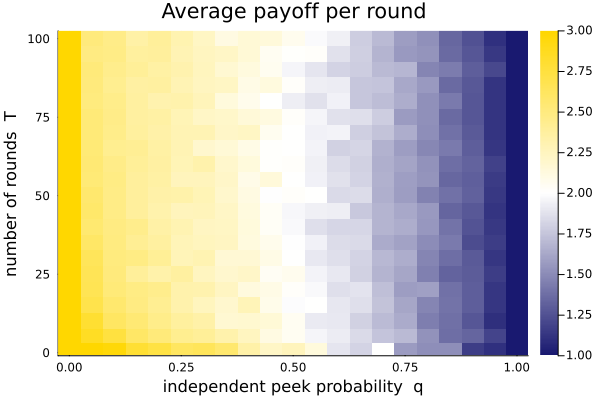

In [9]:
#plot
cs = cgrad([:midnightblue, :white, :gold])   # dark at 1, bright at 3

payoffs1 = plot(
    q_vals, T_vals, heat;
    st    = :heatmap,
    xlab  = "independent peek probability  q",
    ylab  = "number of rounds  T",
    title = "Average payoff per round",
    clim  = (1, 3),            # colour scale from punishment to full coop
    c     = cs
)

savefig(payoffs1, "pd_visibility_heatmap.png")
display(payoffs1)